In [45]:
#IMPORT AND FUNCTIONS
# Import libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import math
import numpy as np
pd.set_option('display.max_columns', None)
import tweepy 
import time
import seaborn as sns
import multiindex
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats 
import random
from scipy.optimize import minimize
import ipywidgets as widgets

#deactivate the warnings
import warnings
warnings.filterwarnings("ignore")

#data received through csv of yahoo finance
portfolio_path = "C:/Users/jacop/Downloads/quotes.csv"
portfolio = pd.read_csv(portfolio_path)

#this make the code ready for different nomeclatures of the column with the tickers 
#add more if necessary
try:
   my_ticks = list(portfolio["Symbol"])
except KeyError:
   my_ticks = list(portfolio["Ticker"])

period = "2y"
interval = "1d"

#query to the Yahoo Finance API for all the stocks in the list 
#2 years, one value per day
df_list = [yf.download(tick, period = period, interval = interval) for tick in my_ticks]

#if our initial database doesn't include prices and quantity we automatically
#put the values to 1 to run the code
try:
   portfolio["Purchase Price"]
except KeyError:
   portfolio["Purchase Price"] = [1]*portfolio.shape[0]

try:
   portfolio["Quantity"]
except KeyError:
   portfolio["Quantity"] = [1]*portfolio.shape[0]
        

#import SPY as a reference for the SP500 
#remember to keep the same period and interval
spy = yf.download("SPY", period = period, interval = interval)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [46]:
#Creation of variables and dataframes
total_portfolio = 0

#individual stocks new variables
for i in range(len(my_ticks)):
    df_list[i]["20 day mean"] = df_list[i]["Adj Close"].rolling(20).mean()
    df_list[i]["Upper"] = df_list[i]["20 day mean"] + 2*(df_list[i]["Adj Close"].rolling(20).std())
    df_list[i]["Lower"] = df_list[i]["20 day mean"] - 2*(df_list[i]["Adj Close"].rolling(20).std())
    df_list[i]["Daily Returns"] = (df_list[i]["Adj Close"]/df_list[i]["Adj Close"].shift(1))-1
    df_list[i]["Cumulative Daily Return"] = (1+ df_list[i]["Daily Returns"]).cumprod()
    total_portfolio += df_list[i]["Adj Close"].tail(1)*portfolio.loc[i,"Quantity"]

#calculation of the weights per stock
for i in range(len(my_ticks)):
    df_list[i]["Normed Return"] = df_list[i]["Adj Close"]/df_list[i].iloc[0]["Adj Close"] 
    portfolio.loc[i,"% of allocation"] = float(df_list[i]["Adj Close"].dropna().tail(1))*portfolio.loc[i,"Quantity"]/float(total_portfolio)

#creation of weighted total portfolio over time
for i in range(len(my_ticks)):
    df_list[i]["Allocation"]= df_list[i]["Normed Return"].dropna()*portfolio.loc[i,"% of allocation"]
    df_list[i]["Position Values"]=df_list[i]["Allocation"].dropna()*float(total_portfolio)
all_pos = [df["Position Values"].dropna() for df in df_list]
portfolio_df = pd.concat(all_pos, axis = 1)
portfolio_df.columns = my_ticks
portfolio_df = portfolio_df.dropna()
#portfolio new variables
portfolio_df["Total Position"] = portfolio_df.sum(axis=1)
portfolio_df["Daily Returns"] = portfolio_df["Total Position"].pct_change(1)
portfolio_df["Cumulative Daily Return"] = (1+ portfolio_df["Daily Returns"]).cumprod()
portfolio_df["20 day mean"] = portfolio_df["Total Position"].rolling(20).mean()

#S&P500 reference
spy["Daily Returns"] = spy["Close"].pct_change(1)
spy["Cumulative Daily Return"] = (1+ spy["Daily Returns"]).cumprod()    





BABA
Loss :   -19 $   -3 % 


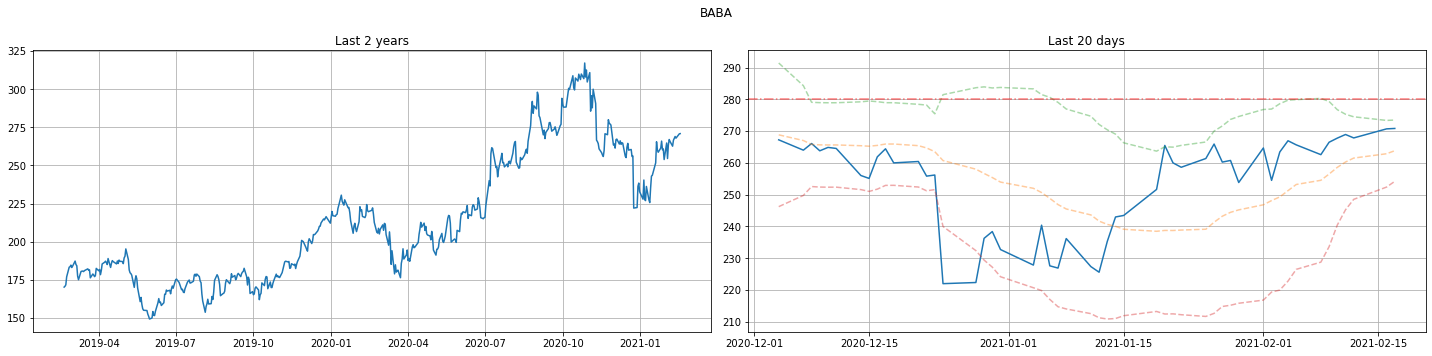


Beta:  0.37036   Alpha:  0.00033


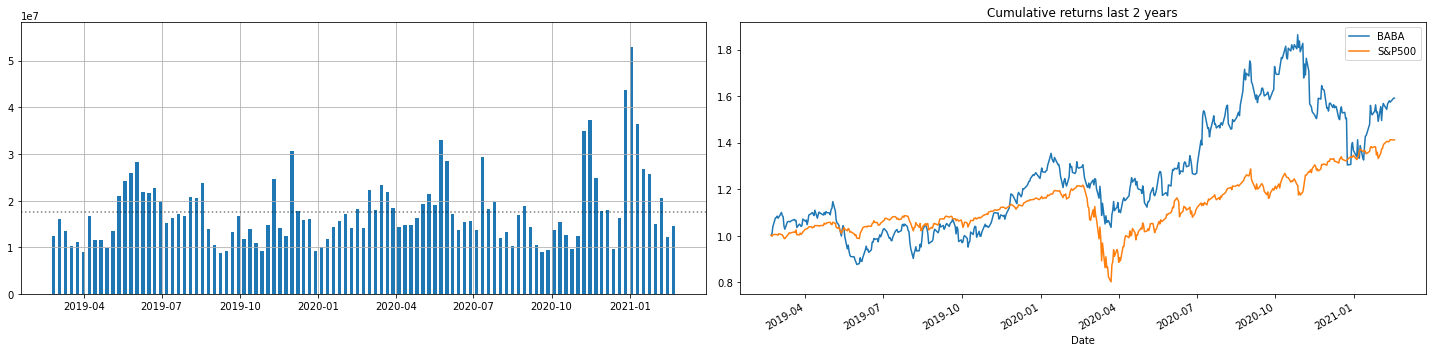

Mean Daily Return:  0.12 %
Annualized Return:  54.34 %

Mean Daily Return (last 20 days):  0.39 %
Annualized Return (last 20 days):  318.21 %


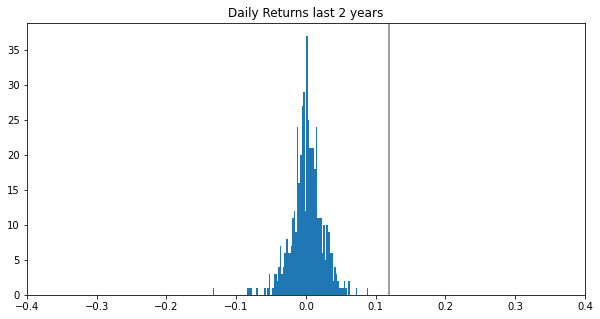





VUSA.MI
Gain :   + 175 $   + 8 % 


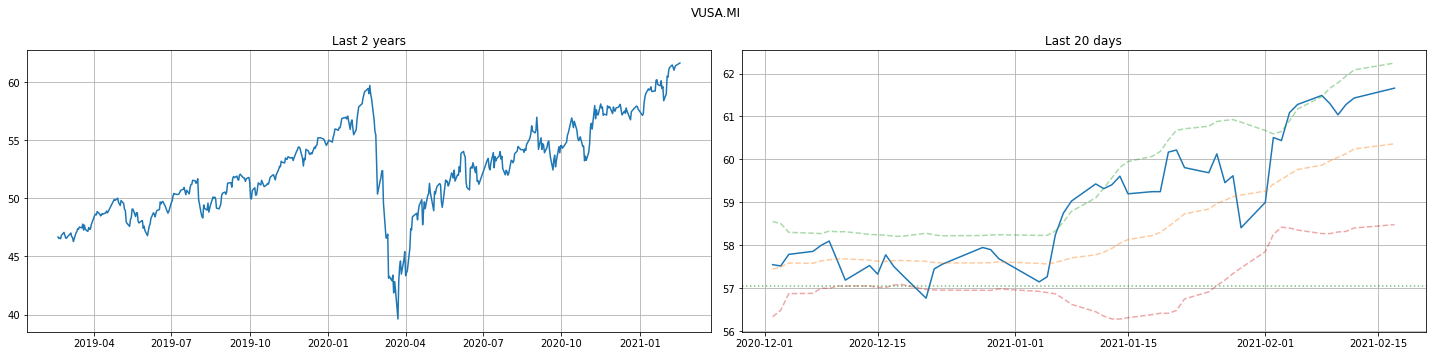


Beta:  -0.00053   Alpha:  0.00085


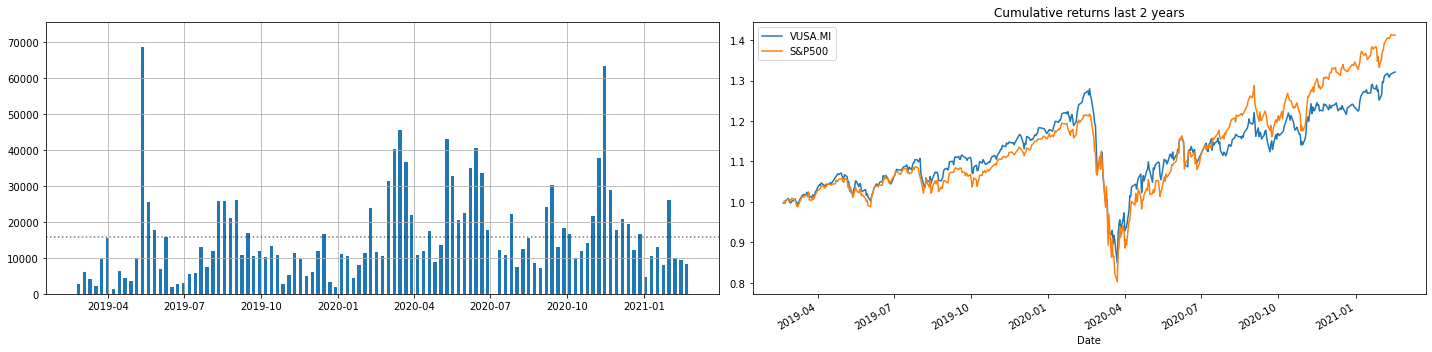

Mean Daily Return:  0.06 %
Annualized Return:  26.76 %

Mean Daily Return (last 20 days):  0.2 %
Annualized Return (last 20 days):  110.36 %


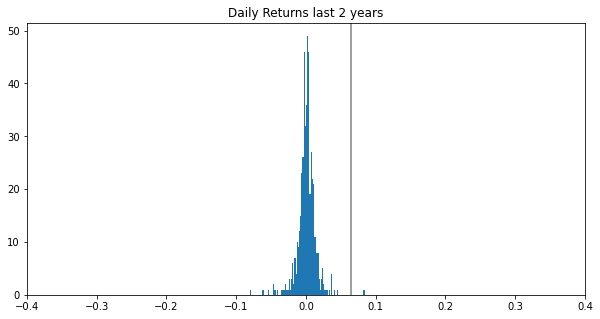





TSLA.MI
Gain :   + 150 $   + 8 % 


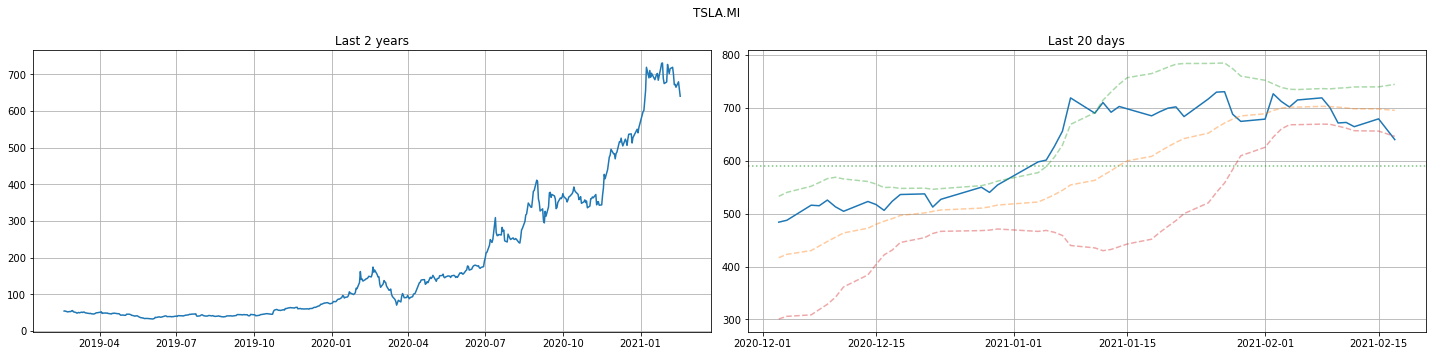


Beta:  0.04197   Alpha:  0.00052


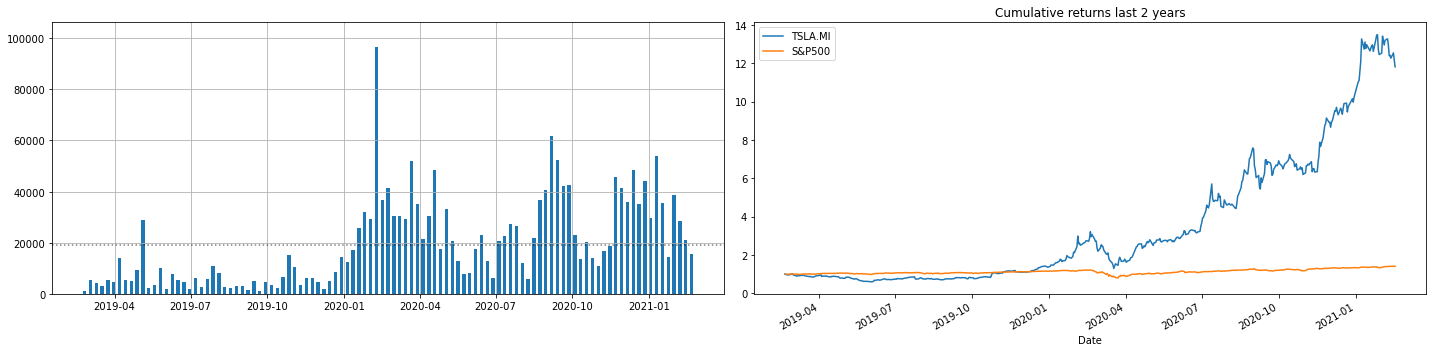

Mean Daily Return:  0.59 %
Annualized Return:  755.24 %

Mean Daily Return (last 20 days):  -0.35 %
Annualized Return (last 20 days):  -71.81 %


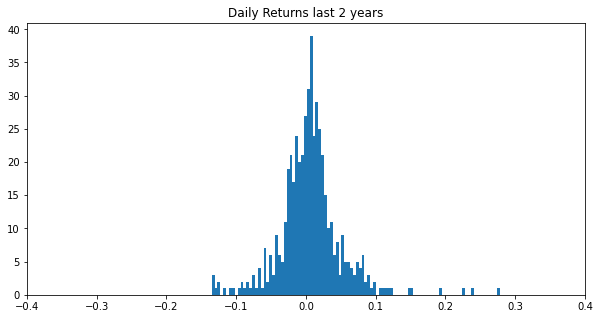





ERCB.DE
Gain :   + 116 $   + 26 % 


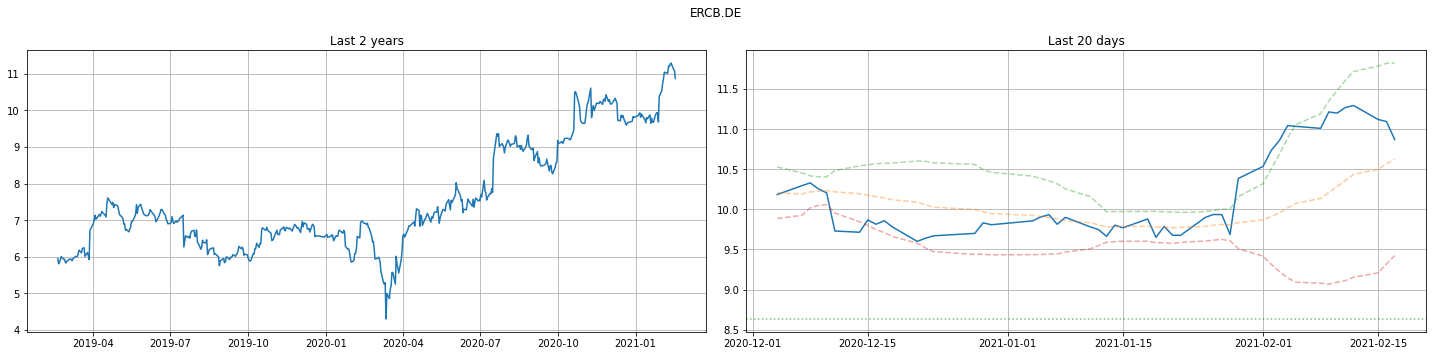


Beta:  0.24317   Alpha:  0.00043


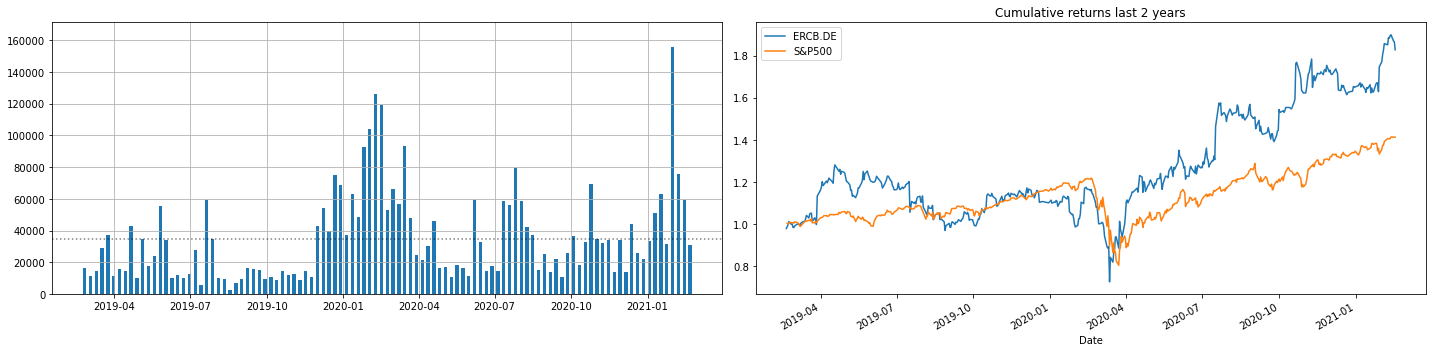

Mean Daily Return:  0.15 %
Annualized Return:  74.72 %

Mean Daily Return (last 20 days):  0.55 %
Annualized Return (last 20 days):  627.16 %


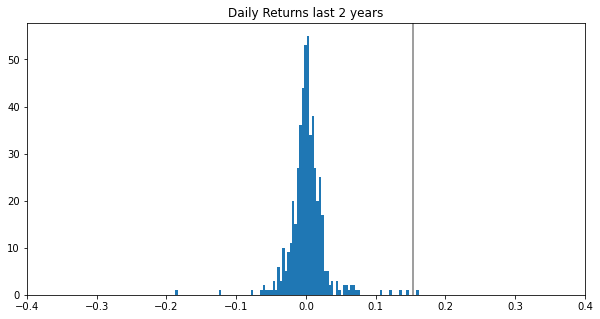





TDOC
Gain :   + 258 $   + 29 % 


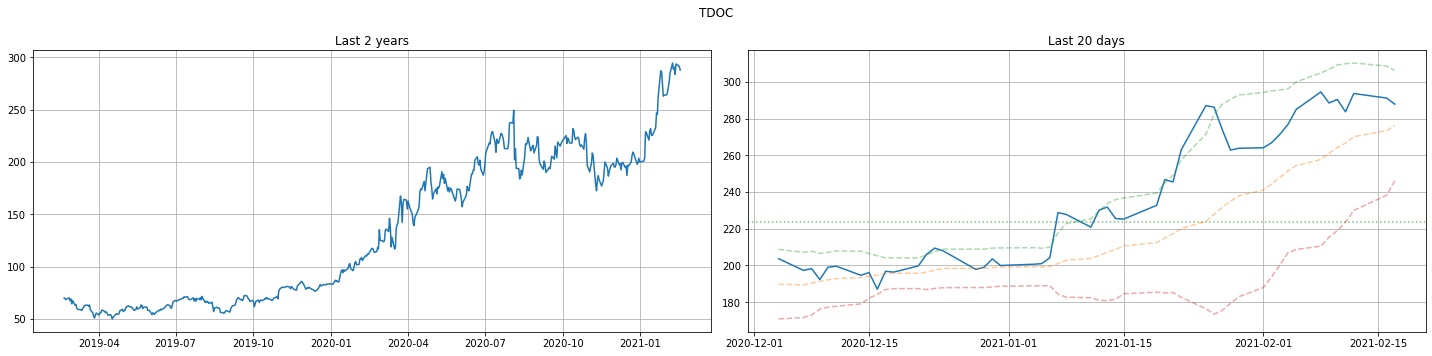


Beta:  0.06418   Alpha:  0.00056


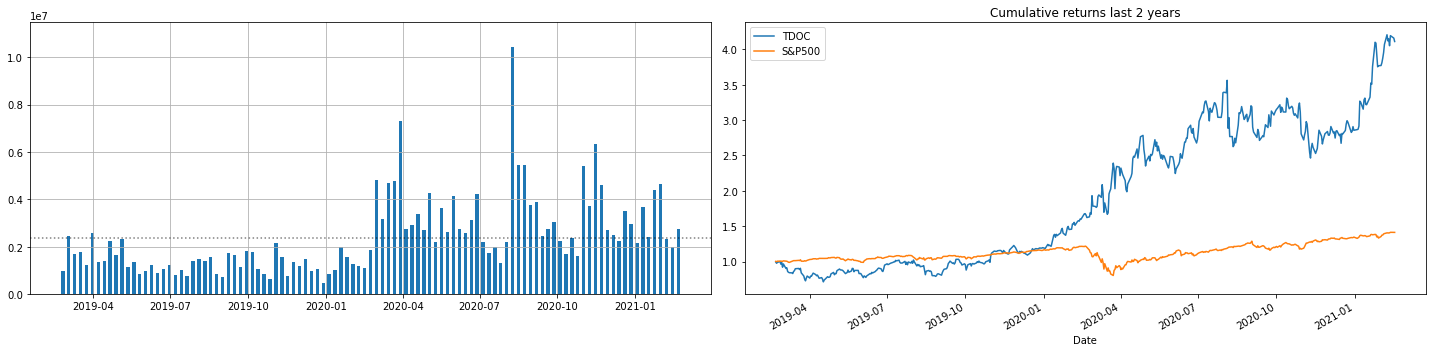

Mean Daily Return:  0.35 %
Annualized Return:  264.18 %

Mean Daily Return (last 20 days):  1.13 %
Annualized Return (last 20 days):  5851.97 %


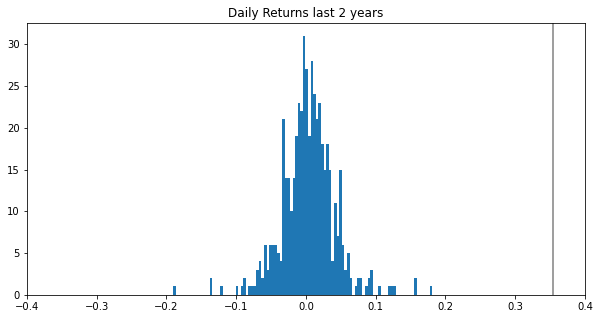





TEL
Gain :   + 253 $   + 48 % 


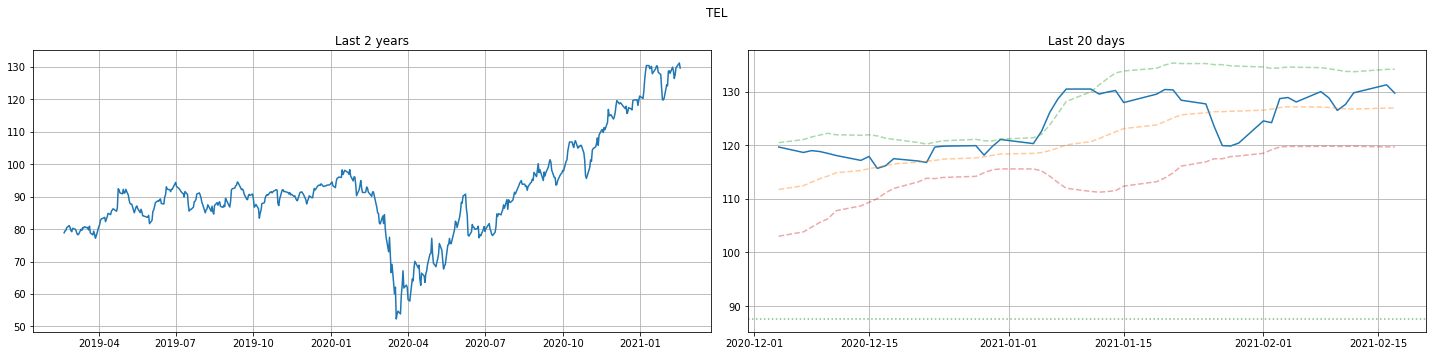


Beta:  0.54868   Alpha:  0.0001


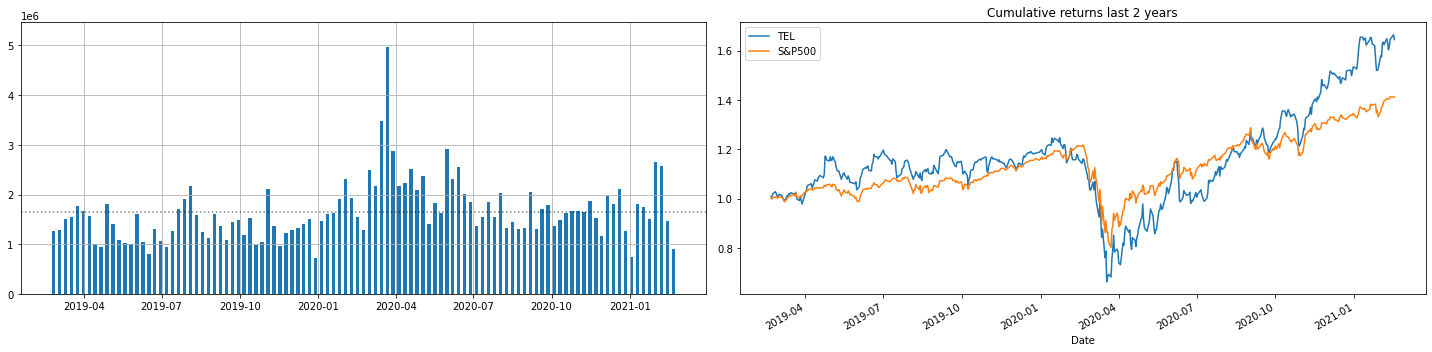

Mean Daily Return:  0.13 %
Annualized Return:  58.83 %

Mean Daily Return (last 20 days):  0.02 %
Annualized Return (last 20 days):  8.5 %


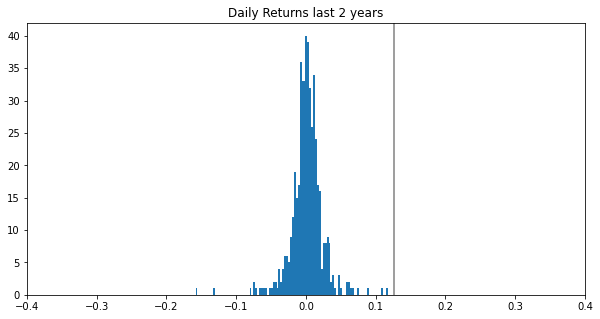





SNE
Gain :   + 150 $   + 19 % 


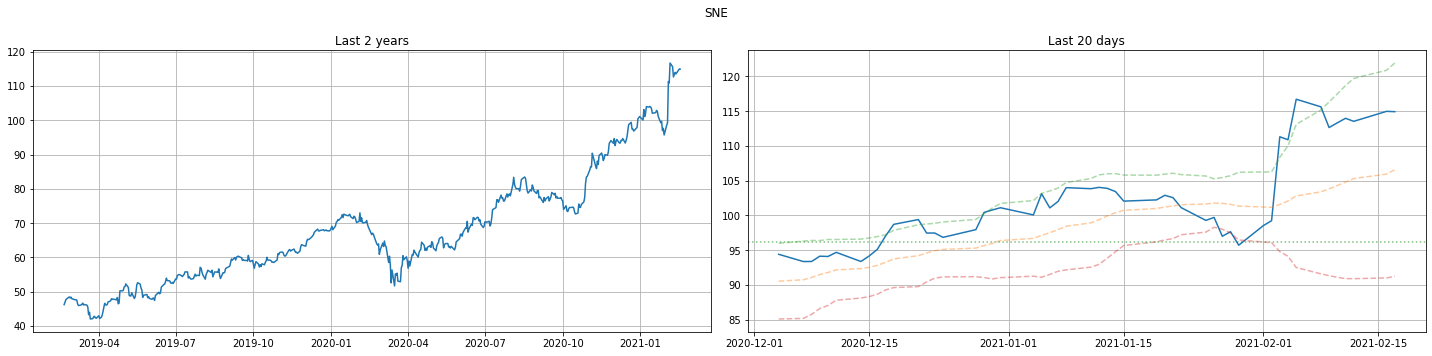


Beta:  0.59986   Alpha:  -0.00039


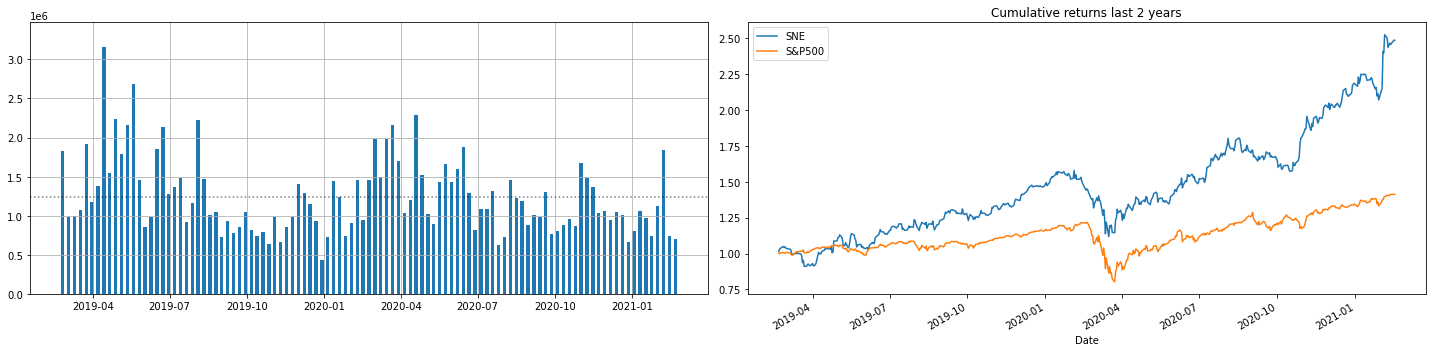

Mean Daily Return:  0.2 %
Annualized Return:  107.7 %

Mean Daily Return (last 20 days):  0.64 %
Annualized Return (last 20 days):  908.88 %


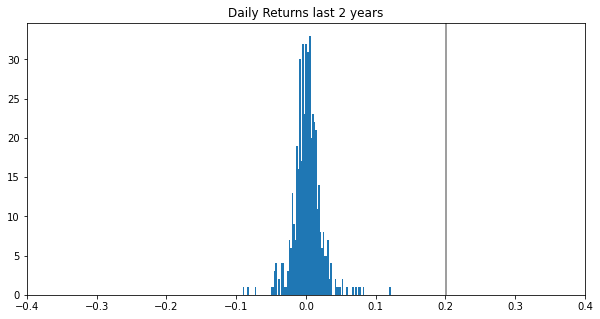





NVDA.MI
Gain :   + 441 $   + 29 % 


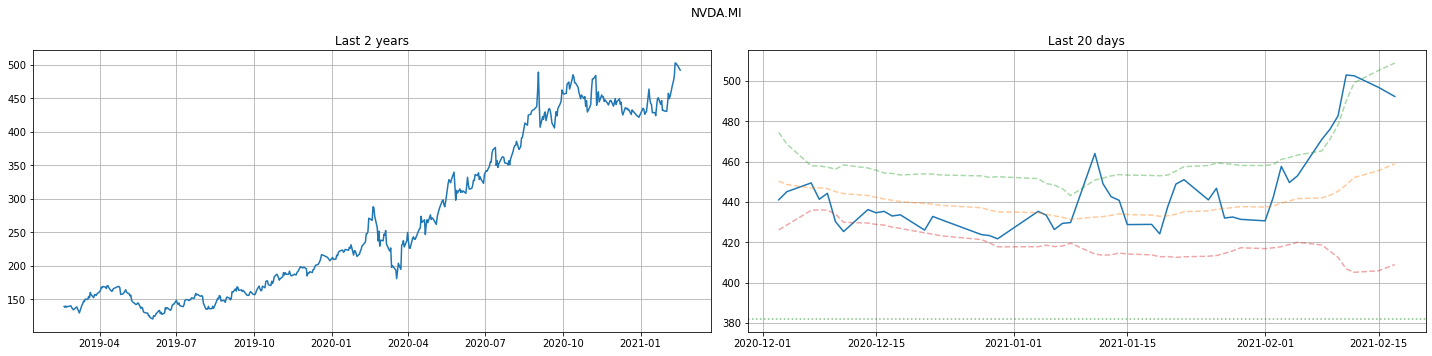


Beta:  0.20124   Alpha:  0.00015


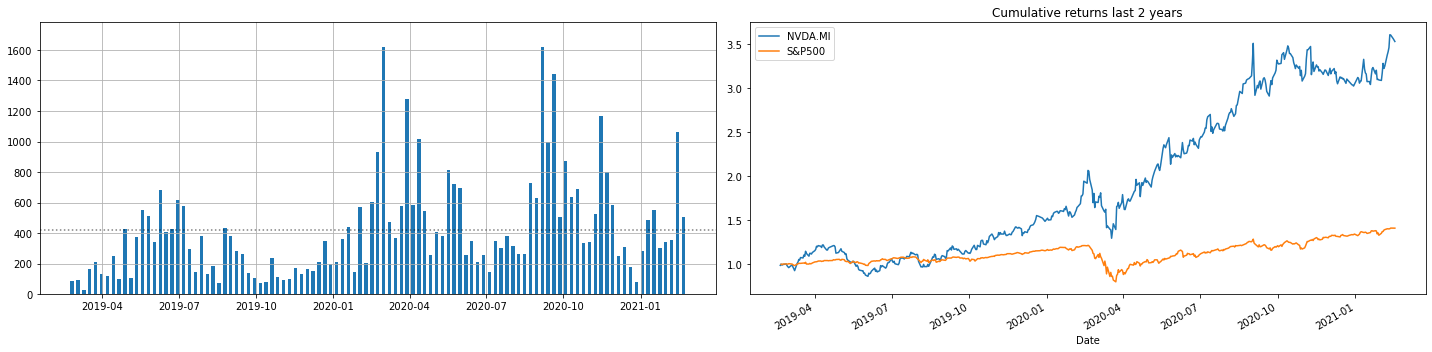

Mean Daily Return:  0.29 %
Annualized Return:  190.51 %

Mean Daily Return (last 20 days):  0.77 %
Annualized Return (last 20 days):  1533.6 %


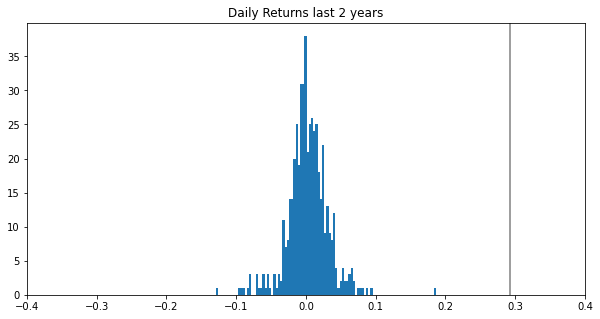





NFLX.MI
Loss :   -7 $   0 % 


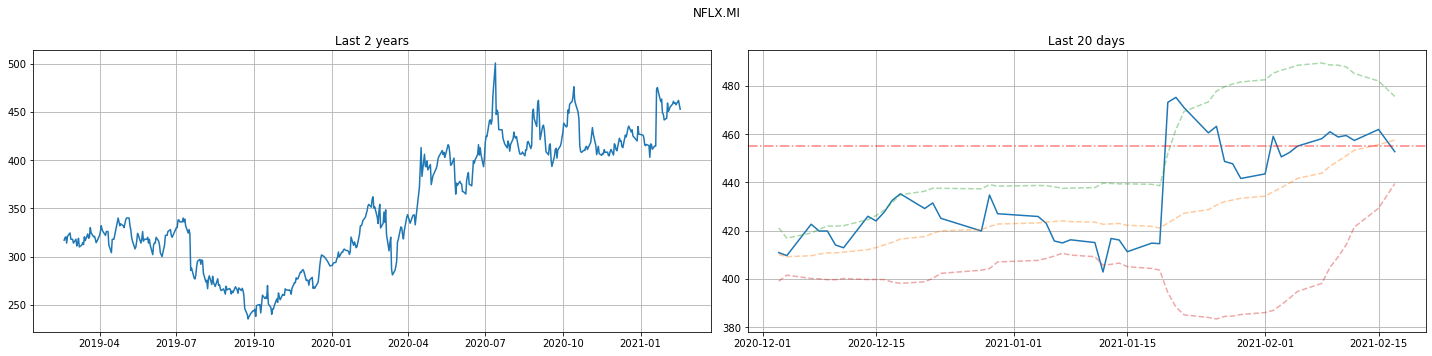


Beta:  0.08989   Alpha:  0.00074


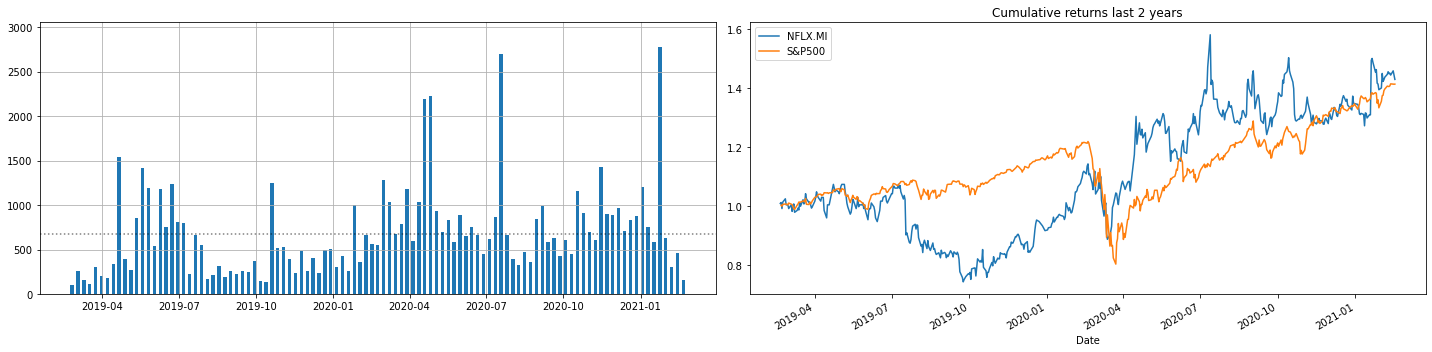

Mean Daily Return:  0.1 %
Annualized Return:  44.44 %

Mean Daily Return (last 20 days):  0.5 %
Annualized Return (last 20 days):  507.13 %


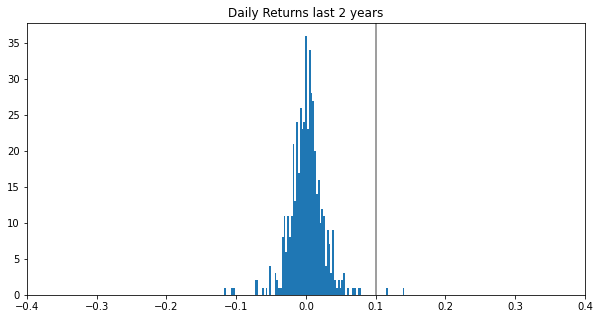

In [9]:
#ANALYSIS PER STOCK
total_gain = 0
total_invested = 0
for i in range(len(my_ticks)):
    
    #retrieve the ticker
    tick = my_ticks[i]
    #print the ticker
    print("\n\n\n\n"+'\033[1m'+'\033[94m' +tick+'\033[0m')
    
    #calculation of many values to be shown later on
    purch = portfolio.loc[i,"Purchase Price"]
    last_price =  df_list[i].tail(1)["Adj Close"]
    share = portfolio.loc[i,"Quantity"]
    gain= float(last_price-purch)
    mean_return = df_list[i]["Daily Returns"].dropna().mean()*100
    annualized_return = ((((mean_return/100)+1)**365)-1)*100
    mean_return_last20days = df_list[i]["Daily Returns"].dropna().tail(20).mean()*100
    annualized_return_last20days = ((((mean_return_last20days/100)+1)**365)-1)*100
    total_gain += gain*share
    total_invested += purch*share
    #regression of the last 400 days of the stock on the SPY
    beta, alpha, r_value, p_value, std_err = stats.linregress(df_list[i]["Daily Returns"].dropna().tail(400), spy["Daily Returns"].dropna().tail(400))
    
    #show gain or loss based on the purchased price per stock
    if gain >= 0:
        print('\033[1m' +"Gain : "'\033[0m',end= " ") 
        print('\033[32m',"+",round(float(gain*share)),"$",end= "   ")
        print("+",round(float(gain/purch)*100),"%",'\033[0m')
    else:
        print('\033[1m' +"Loss : "'\033[0m',end= " ") 
        print('\033[31m',round(float(gain*share)),"$",end= "   ")
        print(round(float(gain/purch)*100),"%",'\033[0m')
    
    #plot of the stock price for the whole period
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
    fig.suptitle(tick)
    ax1.grid()
    ax1.plot(df_list[i].index, df_list[i]["Adj Close"])
    ax1.set_title("Last 2 years")
    
    #plot of the stock price for the last 20 days 
    #togheter with the 50 days floating mean, upper and lower limit
    #shown a line with the purchase price
    ax2.grid()
    ax2.plot(df_list[i].tail(50).index, df_list[i]["Adj Close"].tail(50), alpha = 1)
    ax2.plot(df_list[i].tail(50).index, df_list[i][["20 day mean", "Upper", "Lower"]].tail(50), alpha = (.4), linestyle = "--")
    if gain >= 0:
        ax2.axhline(y=purch, color='g', linestyle='dotted', alpha=.5)
    else:
        ax2.axhline(y=purch, color='r', linestyle="-.", alpha = .5)
    
    ax2.set_title("Last 20 days")
    fig.tight_layout()
    plt.show()
    
    #show beta and alpha from the regression
    print('\033[1m' + "\nBeta: "'\033[0m', round(beta, 5), end= "   ")
    print('\033[1m' + "Alpha: "'\033[0m', round(alpha,5))
    
    #plotted the volume of sales aggregated per week (mean)
    fig, (ax21, ax22) = plt.subplots(1, 2,figsize=(20,5))
    ax21.grid()
    ax21.bar(x= df_list[i].resample(rule="w").mean().index, height=df_list[i]["Volume"].resample(rule="w").mean(), width = 4)
    ax21.axhline(y=df_list[i]["Volume"].resample(rule="w").mean().mean(), color='black', linestyle='dotted', alpha=.5)
    ax21.set_ylim(0,df_list[i]["Volume"].resample(rule="w").mean().max()*1.1)
    
    #plot cumulative return
    ax22.grid()
    ax22 = df_list[i]["Cumulative Daily Return"].plot()
    ax22 = spy["Cumulative Daily Return"].plot()
    ax22.legend([tick, "S&P500"])
    ax22.set_title("Cumulative returns last 2 years")
    fig.tight_layout()
    plt.show()
    
    #show various indexes on the returns
    print('\033[1m' +"Mean Daily Return: "'\033[0m',
          round(mean_return,2),"%",) 
    print('\033[1m' +"Annualized Return: "'\033[0m',
          round(annualized_return,2),"%") 
    print('\033[1m' +"\nMean Daily Return (last 20 days): "'\033[0m',
          round(mean_return_last20days,2),"%",) 
    print('\033[1m' +"Annualized Return (last 20 days): "'\033[0m',
      round(annualized_return_last20days,2),"%") 
    
    #plot the distribution of the daily returns over time
    plt.figure(figsize=(10,5))
    plt.hist(df_list[i]["Daily Returns"].dropna(), bins = 100)
    plt.axvline(x= mean_return,color='black', linestyle="-", alpha=.5 )
    plt.title("Daily Returns last 2 years")
    plt.xlim(-0.4,+0.4)
    plt.show()





PORTFOLIO
Gain :   + 1517 $   + 15 % 


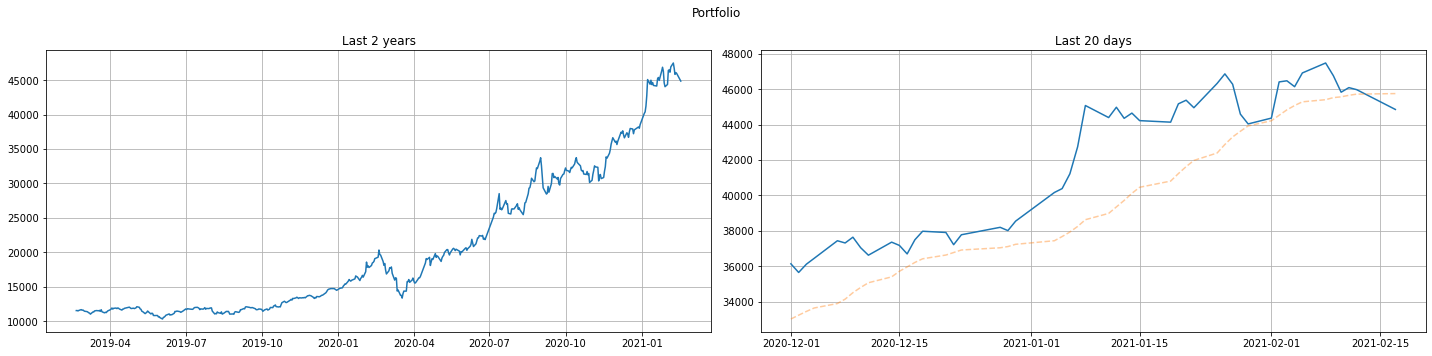


Beta:  -0.00864   Alpha:  0.00088
Mean Daily Return:  0.31 %
Annualized Return:  204.18 %

Mean Daily Return (last 20 days):  0.09 %
Annualized Return (last 20 days):  38.39 %


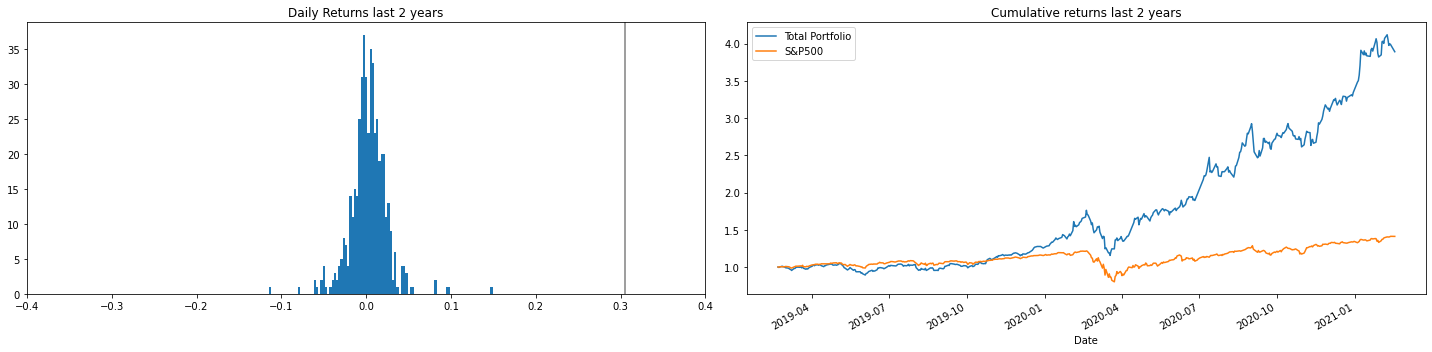

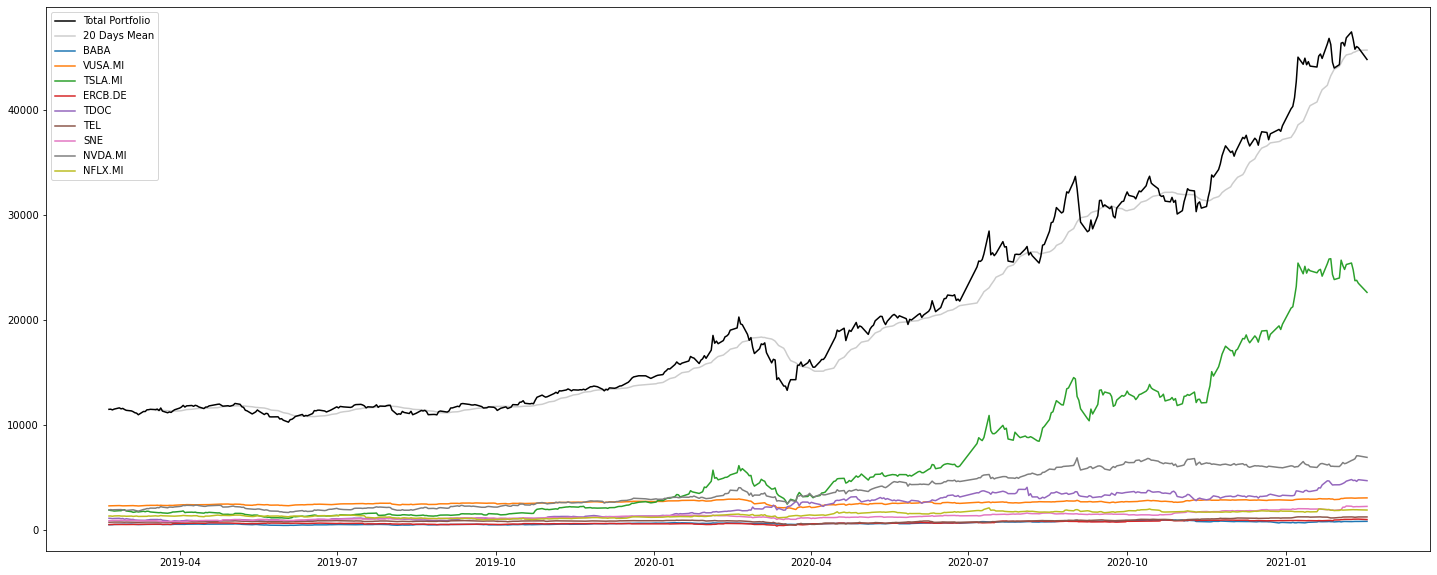

In [39]:
#ANALYSIS PORTFOLIO

#very similar process as the one for single stock
print("\n\n\n\n"+'\033[1m'+'\033[94m' +"PORTFOLIO"+'\033[0m')

if total_gain >= 0:
    print('\033[1m' +"Gain : "'\033[0m',end= " ") 
    print('\033[32m',"+",round(float(total_gain)),"$",end= "   ")
    print("+",round(float(total_gain/total_invested)*100),"%",'\033[0m')
else:
    print('\033[1m' +"Loss : "'\033[0m',end= " ") 
    print('\033[31m',round(float(total_gain)),"$",end= "   ")
    print(round(float(total_gain/total_invested)*100),"%",'\033[0m')
    
#various calcularions shown later on
mean_return = portfolio_df["Daily Returns"].dropna().mean()*100
annualized_return = ((((mean_return/100)+1)**365)-1)*100
mean_return_last20days = portfolio_df["Daily Returns"].dropna().tail(20).mean()*100
annualized_return_last20days = ((((mean_return_last20days/100)+1)**365)-1)*100

#regression on SPY
beta, alpha, r_value, p_value, std_err = stats.linregress(portfolio_df["Daily Returns"].dropna().tail(400), spy["Daily Returns"].dropna().tail(400))

#plotted overall value over whole periods
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle("Portfolio")
ax1.grid()
ax1.plot(portfolio_df["Total Position"].index, portfolio_df["Total Position"])
ax1.set_title("Last 2 years")

#plotted overall value over last 20 days
ax2.grid()
ax2.plot(portfolio_df["Total Position"].tail(50).index, portfolio_df["Total Position"].tail(50), alpha = 1)
ax2.plot(portfolio_df["20 day mean"].tail(50).index, portfolio_df["20 day mean"].tail(50), alpha = (.4), linestyle = "--")

ax2.set_title("Last 20 days")
fig.tight_layout()
plt.show()

#show beta and alpha from the regression
print('\033[1m' + "\nBeta: "'\033[0m', round(beta, 5), end= "   ")
print('\033[1m' + "Alpha: "'\033[0m', round(alpha,5))



#show various indexes on the returns
print('\033[1m' +"Mean Daily Return: "'\033[0m',
      round(mean_return,2),"%",) 
print('\033[1m' +"Annualized Return: "'\033[0m',
      round(annualized_return,2),"%") 
print('\033[1m' +"\nMean Daily Return (last 20 days): "'\033[0m',
      round(mean_return_last20days,2),"%",) 
print('\033[1m' +"Annualized Return (last 20 days): "'\033[0m',
      round(annualized_return_last20days,2),"%") 

#plot distribution of daily returns 
fig, (ax21, ax22) = plt.subplots(1, 2,figsize=(20,5))
ax21.hist(portfolio_df["Daily Returns"].dropna(), bins = 100)
ax21.axvline(x= mean_return,color='black', linestyle="-", alpha=.5 )
ax21.set_title("Daily Returns last 2 years")
ax21.set_xlim(-0.4,+0.4)

#plot cumulative daily return
ax22.grid()
ax22 = portfolio_df["Cumulative Daily Return"].plot()
ax22 = spy["Cumulative Daily Return"].plot()
ax22.legend(["Total Portfolio", "S&P500"])
ax22.set_title("Cumulative returns last 2 years")
fig.tight_layout()
plt.show()

plt.show()

#plot all the tickers together
plt.figure(figsize = (24.8,10))
plt.plot(portfolio_df["Total Position"],color="black")
plt.plot(portfolio_df["20 day mean"],color="black", alpha=0.2, linestyle="-")
plt.plot(portfolio_df[my_ticks])
plt.legend(["Total Portfolio", "20 Days Mean"]+my_ticks)
plt.show()


Average Correlation :  0.801
Average Correlation with S&P500:  0.853


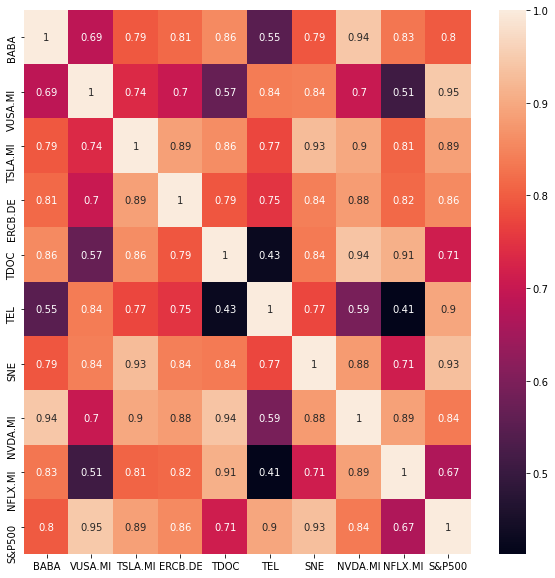

In [43]:
#CORRELATION BETWEEN STOCKS

#calculate the correlation matrix
corr_matrix = portfolio_df[my_ticks].join(spy["Adj Close"], how="left").corr()

#print some useful values
print('\033[1m' +"Average Correlation : "'\033[0m', round(corr_matrix[my_ticks].mean().mean(),3) )
print('\033[1m' +"Average Correlation with S&P500: "'\033[0m', round(corr_matrix["Adj Close"].mean(),3) )

#plot the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_matrix,annot= True)
ax.set_xticklabels(my_ticks +["S&P500"])
ax.set_yticklabels(my_ticks+["S&P500"])
plt.show()

Sharpe Ratio optimization, all time query


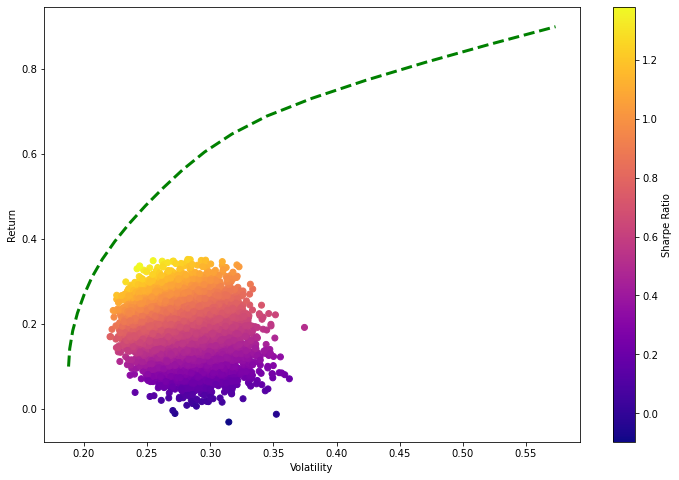

Actual Values 

Return : 0.2630753205354767
Volatility : 0.2645670474889933
Sharpe Ratio : 0.9943616298111403


Optimization results 

Return : 0.6153887815622621
Volatility : 0.30046816752937616
Sharpe Ratio : 2.0480997591936148

 AMZN 
Actual:  0.53      Optimal:  0.07

 BAC 
Actual:  0.01      Optimal:  0.0

 EEM 
Actual:  0.01      Optimal:  0.0

 EMQQ 
Actual:  0.01      Optimal:  0.58

 HNP 
Actual:  0.0      Optimal:  0.0

 IBB 
Actual:  0.03      Optimal:  0.0

 CQQQ 
Actual:  0.02      Optimal:  0.13

 ISRG 
Actual:  0.13      Optimal:  0.0

 JPM 
Actual:  0.02      Optimal:  0.0

 MARS.L 
Actual:  0.01      Optimal:  0.0

 MRNA 
Actual:  0.03      Optimal:  0.22

 MSFT 
Actual:  0.04      Optimal:  0.0

 SPGI 
Actual:  0.05      Optimal:  0.0

 SAGA.L 
Actual:  0.05      Optimal:  0.0

 SBRY.L 
Actual:  0.04      Optimal:  0.0

 SPXL 
Actual:  0.01      Optimal:  0.0

 TALK.L 
Actual:  0.02      Optimal:  0.0


In [32]:
#SHARPE RATIO OPTIMIZATION
print("Sharpe Ratio optimization, all time query")

#put together all the adj. close for every stock
stocks = portfolio_df[my_ticks]
#calculate the logarithmic returns
log_ret= np.log(stocks/stocks.shift(1))

#we are gonna take 10000 random weights to plot the sharpe ratio distribution
num_ports = 10000

#empty arrays for weights, return, volatility, sharpe ratio
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

#for loop to create random weights and calculate return, volatility and sharpe ratio
for ind in range(num_ports):
    weights = np.array(np.random.random(len(stocks.columns)))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr[ind]=  np.sum((log_ret.mean()*weights)*252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

#Takes in weights, returns array or return,volatility, sharpe ratio
#useful to translate the final result of the optimization in its coefficient
def get_ret_vol_sr(weights):
    
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

#we are going to minimize the negative sharpe ratio (== maximize the sharpe ratio)
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

#constraint formula: returns zero if sum of weights is 1.0
def check_sum(weights):
    return np.sum(weights) - 1

#constraint dictionary
cons = ({'type':'eq','fun': check_sum})

# 0-1 bounds for each weight
bounds = ((0, 1),)*len(stocks.columns)
#initial guess with all weights equal
init_guess = list(np.repeat(1/len(stocks.columns), len(stocks.columns)))

#optimization with SLSQP
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

# Create a linspace number of points where we'll calculate the frontier
frontier_y = np.linspace(0.1,0.9,20) 

#function to minimize to find the frontier
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 
frontier_volatility = []

#run the optimization for every value in the linspace
for possible_return in frontier_y:
    #constraints: sum of weights == 0 and don't modify the return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    #optimization to minimize volatility
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

#plot of the results
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)
plt.plot(opt_values[1],opt_values[0],'X', color = "black") 
plt.show()

opt_results.x
opt_values = get_ret_vol_sr(opt_results.x)
actual_values = get_ret_vol_sr(portfolio["% of allocation"])

#print of the results
print('\033[1m' +"Actual Values \n"'\033[0m')
print('\033[1m' +"Return :"'\033[0m',actual_values[0])
print('\033[1m' +"Volatility :"'\033[0m',actual_values[1])
print('\033[1m' +"Sharpe Ratio :"'\033[0m',actual_values[2])

print('\033[1m' +"\n\nOptimization results \n"'\033[0m')
print('\033[1m' +"Return :"'\033[0m',opt_values[0])
print('\033[1m' +"Volatility :"'\033[0m',opt_values[1])
print('\033[1m' +"Sharpe Ratio :"'\033[0m',opt_values[2])

for i in range(len(my_ticks)):
    print("\n",'\033[1m'+my_ticks[i]+'\033[0m',"\nActual: ",round(portfolio.loc[i,"% of allocation"],2),"     Optimal: ",round(opt_results.x[i],2))


In [53]:
#Variables for custom optimization
print("""If "optimal", optimization on Sharpe Ratio.
If volatility", optimization with volatility max (select max volatility).""")
print("Select how much % of the portfolio for each stock can be allocated")
print("Select how many days in the past consider for the analysis.")


radiobuttons1 = widgets.RadioButtons(
    value='optimal', 
    options=['optimal', 'volatility'], 
    description='Parameters'
)

int_slider1 = widgets.IntSlider(
    value=30, 
    min=0, max=50, step=1, 
    description='Max volatility %'
)




int_slider2 = widgets.IntSlider(
    value=200, 
    min=0, max=500, step=1, 
    description='Days'
)

int_slider3 = widgets.IntSlider(
    value=60, 
    min=0, max=100, step=1, 
    description='Max % per stock'
)

widgets.VBox(
    [
        radiobuttons1,
        int_slider1, 
        int_slider3,
        int_slider2

    ]
)

If "optimal", optimization on Sharpe Ratio.
If volatility", optimization with volatility max (select max volatility).
Select how much % of the portfolio for each stock can be allocated
Select how many days in the past consider for the analysis.


Sharpe Ratio optimization, last 200 days


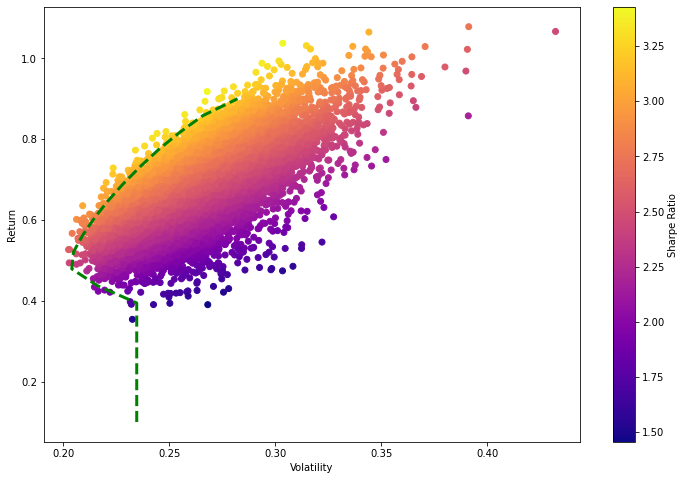

Actual Values 

Return : 0.7371734496146096
Volatility : 0.2787933470366657
Sharpe Ratio : 2.6441572492677157


Optimization results 

Return : 0.8742552058681583
Volatility : 0.2704431041041636
Sharpe Ratio : 3.2326770126533932

 BABA 
Actual:  0.05      Optimal:  0.0

 VUSA.MI 
Actual:  0.2      Optimal:  0.11

 TSLA.MI 
Actual:  0.17      Optimal:  0.17

 ERCB.DE 
Actual:  0.05      Optimal:  0.15

 TDOC 
Actual:  0.1      Optimal:  0.06

 TEL 
Actual:  0.07      Optimal:  0.17

 SNE 
Actual:  0.08      Optimal:  0.17

 NVDA.MI 
Actual:  0.17      Optimal:  0.17

 NFLX.MI 
Actual:  0.12      Optimal:  0.0


In [54]:
#SHARPE RATIO OPTIMIZATION (custom)
opt_or_vol = radiobuttons1.value
days = int_slider2.value
max_volatility = int_slider1.value/100
max_per_stock = int_slider3.value/100



print(f"Sharpe Ratio optimization, last {days} days")
stocks = portfolio_df[my_ticks].tail(days)
log_ret= np.log(stocks/stocks.shift(1))

num_ports = 10000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(len(stocks.columns)))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr[ind]=  np.sum((log_ret.mean()*weights)*252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

# Contraints
def check_sum(weights):

    return np.sum(weights) - 1

cons = ({'type':'eq','fun': check_sum})
# 0-1 bounds for each weight
bounds = ((0, max_per_stock),)*len(stocks.columns)
init_guess = list(np.repeat(1/len(stocks.columns), len(stocks.columns)))
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0.1,0.9,20) 
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)
plt.show()

opt_results.x
opt_values = get_ret_vol_sr(opt_results.x)
actual_values = get_ret_vol_sr(portfolio["% of allocation"])
if opt_or_vol == "optimal":
    print('\033[1m' +"Actual Values \n"'\033[0m')
    print('\033[1m' +"Return :"'\033[0m',actual_values[0])
    print('\033[1m' +"Volatility :"'\033[0m',actual_values[1])
    print('\033[1m' +"Sharpe Ratio :"'\033[0m',actual_values[2])
    
    print('\033[1m' +"\n\nOptimization results \n"'\033[0m')
    print('\033[1m' +"Return :"'\033[0m',opt_values[0])
    print('\033[1m' +"Volatility :"'\033[0m',opt_values[1])
    print('\033[1m' +"Sharpe Ratio :"'\033[0m',opt_values[2])
    
    for i in range(len(my_ticks)):
        print("\n",'\033[1m'+my_ticks[i]+'\033[0m',"\nActual: ",round(portfolio.loc[i,"% of allocation"],2),"     Optimal: ",round(opt_results.x[i],2))
elif opt_or_vol == "volatility":
        
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[1] - max_volatility})
    vol_result = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    vol_values = get_ret_vol_sr(vol_result.x)
    if actual_values[1] > max_volatility:
        print('\033[91m'+"Impossible to reach desired volatility with given stocks\n\n"+'\033[0m')
    print('\033[1m' +"Actual Values \n"'\033[0m')
    print('\033[1m' +"Return :"'\033[0m',actual_values[0])
    print('\033[1m' +"Volatility :"'\033[0m',actual_values[1])
    print('\033[1m' +"Sharpe Ratio :"'\033[0m',actual_values[2])
    
    print('\033[1m' +"\n\nOptimization results \n"'\033[0m')
    print('\033[1m' +"Return :"'\033[0m',vol_values[0])
    print('\033[1m' +"Volatility :"'\033[0m',vol_values[1])
    print('\033[1m' +"Sharpe Ratio :"'\033[0m',vol_values[2])
    
    for i in range(len(my_ticks)):
        print("\n",'\033[1m'+my_ticks[i]+'\033[0m',"\nActual: ",round(portfolio.loc[i,"% of allocation"],2),"     Optimal: ",round(vol_result.x[i],2))
    
else:
    print("error")